## Import dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Initiate Datasets

### Sales data

In [2]:
df = pd.read_csv('data/sales.csv', delimiter=';')
df['date'] = pd.to_datetime(df['date'])

# Show counter for null values
df.isnull().sum()

store                0
day_of_week          0
date                 0
Sales                0
customers_count      0
store_open           0
promo                0
statutory_holiday    0
school_holiday       0
dtype: int64

In [3]:
# Add custom columns
df['year'], df['month'], df['day'] = df['date'].dt.year, df['date'].dt.month, df['date'].dt.day
df['sales_per_customer'] = np.where(df['store_open'] == 1, (df['Sales'] / df['customers_count']), 0)

In [4]:
df_2013 = df.set_index('date')
df_2013 = df_2013.loc['2013-12-31':'2013-1-1']
df_2013.reset_index(inplace=True)

df_2014 = df.set_index('date')
df_2014 = df_2014.loc['2014-12-31':'2014-1-1']
df_2014.reset_index(inplace=True)

year 2013 has more records than 2014

In [5]:
print('Length 2013: ', len(df_2013))
print('Length 2014: ', len(df_2014))

Length 2013:  17836
Length 2014:  16548


## Basic characteristics

In [6]:
df.describe()

,store,day_of_week,Sales,customers_count,store_open,promo,school_holiday,year,month,day,sales_per_customer
count,44870.000000,44870.000000,44870.000000,44870.000000,44870.000000,44870.000000,44870.000000,44870.000000,44870.000000,44870.000000,44865.000000
mean,24.856474,3.998284,5516.552463,597.396345,0.826789,0.381591,0.176376,2013.832917,5.860374,15.703276,7.801140
std,14.192944,1.997407,3425.079280,375.790596,0.378434,0.485782,0.381144,0.776019,3.329011,8.787992,3.996168
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000,0.000000
25%,12.000000,2.000000,3765.000000,411.000000,1.000000,0.000000,0.000000,2013.000000,3.000000,8.000000,7.153652
50%,25.000000,4.000000,5652.000000,602.000000,1.000000,0.000000,0.000000,2014.000000,6.000000,16.000000,8.627477
75%,37.000000,6.000000,7648.000000,819.000000,1.000000,1.000000,0.000000,2014.000000,8.000000,23.000000,10.171751
max,49.000000,7.000000,25737.000000,2849.000000,1.000000,1.000000,1.000000,2015.000000,12.000000,31.000000,24.901205


In [7]:
df_2013.describe()

,store,day_of_week,Sales,customers_count,store_open,promo,school_holiday,year,month,day,sales_per_customer
count,17836.000000,17836.000000,17836.000000,17836.000000,17836.000000,17836.000000,17836.000000,17836.0,17836.000000,17836.000000,17836.000000
mean,25.000000,4.000000,5429.735703,601.127551,0.830792,0.370879,0.181823,2013.0,6.541209,15.760989,7.701577
std,14.142532,2.000056,3340.310919,381.292145,0.374946,0.483054,0.385710,0.0,3.440476,8.774616,3.890777
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0,1.000000,1.000000,0.000000
25%,13.000000,2.000000,3774.000000,409.750000,1.000000,0.000000,0.000000,2013.0,4.000000,8.000000,7.084278
50%,25.000000,4.000000,5552.500000,599.000000,1.000000,0.000000,0.000000,2013.0,7.000000,16.000000,8.487545
75%,37.000000,6.000000,7478.000000,826.000000,1.000000,1.000000,0.000000,2013.0,10.000000,23.000000,9.984016
max,49.000000,7.000000,22822.000000,2849.000000,1.000000,1.000000,1.000000,2013.0,12.000000,31.000000,17.205952


In [8]:
df_2014.describe()

,store,day_of_week,Sales,customers_count,store_open,promo,school_holiday,year,month,day,sales_per_customer
count,16548.000000,16548.000000,16548.000000,16548.000000,16548.000000,16548.000000,16548.000000,16548.0,16548.000000,16548.000000,16543.000000
mean,24.610829,4.001269,5582.824450,603.343365,0.827955,0.383249,0.179720,2014.0,6.311337,15.755076,7.803773
std,14.276140,2.000377,3459.520479,374.615022,0.377431,0.486193,0.383965,0.0,3.434826,8.768362,3.975206
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.0,1.000000,1.000000,0.000000
25%,12.000000,2.000000,3810.000000,421.000000,1.000000,0.000000,0.000000,2014.0,3.000000,8.000000,7.158972
50%,25.000000,4.000000,5717.000000,612.000000,1.000000,0.000000,0.000000,2014.0,6.000000,16.000000,8.633562
75%,37.000000,6.000000,7696.000000,820.000000,1.000000,1.000000,0.000000,2014.0,9.000000,23.000000,10.206645
max,49.000000,7.000000,25737.000000,2835.000000,1.000000,1.000000,1.000000,2014.0,12.000000,31.000000,18.096831


In [9]:
df.corr()

,store,day_of_week,Sales,customers_count,store_open,promo,school_holiday,year,month,day,sales_per_customer
store,1.000000,0.000074,0.003520,-0.058905,-0.002637,-0.000428,-0.005896,-0.002177,-0.011040,-0.000154,0.082211
day_of_week,0.000074,1.000000,-0.527107,-0.489797,-0.539226,-0.392925,-0.220863,0.001929,-0.005385,0.005241,-0.515338
Sales,0.003520,-0.527107,1.000000,0.926744,0.737213,0.516447,0.105999,0.023572,0.056023,-0.010521,0.738776
customers_count,-0.058905,-0.489797,0.926744,1.000000,0.727633,0.400502,0.096618,-0.010982,0.041620,-0.004155,0.570257
store_open,-0.002637,-0.539226,0.737213,0.727633,1.000000,0.301716,0.098395,-0.003079,-0.001507,0.033091,0.893593
promo,-0.000428,-0.392925,0.516447,0.400502,0.301716,1.000000,0.071752,0.024286,-0.011526,-0.108873,0.401893
school_holiday,-0.005896,-0.220863,0.105999,0.096618,0.098395,0.071752,1.000000,-0.027933,0.107235,0.032699,0.094871
year,-0.002177,0.001929,0.023572,-0.010982,-0.003079,0.024286,-0.027933,1.000000,-0.267741,-0.002466,0.033455
month,-0.011040,-0.005385,0.056023,0.041620,-0.001507,-0.011526,0.107235,-0.267741,1.000000,0.012438,0.012795
day,-0.000154,0.005241,-0.010521,-0.004155,0.033091,-0.108873,0.032699,-0.002466,0.012438,1.000000,0.018857


## Anomaly - Store was opened, but  had no customers/sales

In [10]:
df_anomaly = df.loc[((df['store_open'] == 1) & (df['Sales'] == 0))].copy()
df_anomaly.drop('sales_per_customer',axis=1, inplace=True)
df_anomaly

,store,day_of_week,date,Sales,customers_count,store_open,promo,statutory_holiday,school_holiday,year,month,day
15368,28,4,2014-09-04,0,0,1,1,0,0,2014,9,4
15410,28,3,2014-09-03,0,0,1,1,0,1,2014,9,3
15452,28,2,2014-09-02,0,0,1,1,0,1,2014,9,2
24853,25,4,2014-02-13,0,0,1,0,0,0,2014,2,13
24902,25,3,2014-02-12,0,0,1,0,0,0,2014,2,12


### Store data

In [11]:
stores = pd.read_csv('data/stores.csv', delimiter=';')
stores.isnull().sum()
stores.head()

,store,store_type,assortment_type,competition_distance,promo2,promo2_since_week,Promo2_since_year,competition_open_since_month_year
0,1,c,a,1270.0,0,NaN,NaN,9/2008
1,2,a,a,570.0,1,13.0,2010.0,11/2007
2,3,a,a,14130.0,1,14.0,2011.0,12/2006
3,4,c,c,620.0,0,NaN,NaN,9/2009
4,5,a,a,29910.0,0,NaN,NaN,4/2015


## Missing categories in store dataset

Model based on this data could face potential problems in future because some categories are completely missing  

#### assortment_type
- a : basic
- b : extra - **Missing**
- c : extended

In [12]:
stores['assortment_type'].value_counts()

a    29
c    20
Name: assortment_type, dtype: int64

#### store_type
- a
- b - **Missing**
- c
- d 

In [13]:
stores['store_type'].value_counts()

a    28
d    14
c     7
Name: store_type, dtype: int64

### Add aggregations into store dataset

In [14]:
average_sales_customers = df.groupby('store')[["Sales", "customers_count", 'sales_per_customer']].mean()
average_sales_customers.rename(columns={'Sales':'avg_sales', 'customers_count': 'avg_customers', 'sales_per_customer':'avg_spc'}, inplace=True)
average_sales_customers = average_sales_customers.reset_index()
average_sales_customers.tail()

df_stores = pd.merge(average_sales_customers, stores, on='store')
df_stores.tail(2)

,store,avg_sales,avg_customers,avg_spc,store_type,assortment_type,competition_distance,promo2,promo2_since_week,Promo2_since_year,competition_open_since_month_year
47,48,3274.961783,357.238854,7.617687,a,a,1060.0,0,NaN,NaN,5/2012
48,49,6024.730361,438.574310,11.228184,d,c,18010.0,0,NaN,NaN,9/2007


In [15]:
total_sales_customers = df.groupby('store')[["Sales", "customers_count"]].sum()
total_sales_customers.rename(columns={'Sales':'total_sales', 'customers_count': 'total_customers'}, inplace=True)
total_sales_customers = total_sales_customers.reset_index()
total_sales_customers.tail()


df_stores = pd.merge(total_sales_customers, df_stores, on='store')
df_stores.tail(5)

,store,total_sales,total_customers,avg_sales,avg_customers,avg_spc,store_type,assortment_type,competition_distance,promo2,promo2_since_week,Promo2_since_year,competition_open_since_month_year
44,45,4166458,323582,4422.991507,343.505308,10.564246,d,a,9710.0,0,NaN,NaN,2/2014
45,46,3329125,410832,4391.985488,541.994723,6.538415,c,a,1200.0,1,14.0,2011.0,9/2005
46,47,5601760,721790,5946.666667,766.231423,6.394252,a,c,270.0,1,14.0,2013.0,4/2013
47,48,3085014,336519,3274.961783,357.238854,7.617687,a,a,1060.0,0,NaN,NaN,5/2012
48,49,5675296,413137,6024.730361,438.574310,11.228184,d,c,18010.0,0,NaN,NaN,9/2007


In [16]:
df_stores.corr()

,store,total_sales,total_customers,avg_sales,avg_customers,avg_spc,competition_distance,promo2,promo2_since_week,Promo2_since_year
store,1.000000,-0.028787,-0.136851,0.005261,-0.110008,0.220106,-0.184787,0.063828,0.197175,0.208173
total_sales,-0.028787,1.000000,0.848416,0.972072,0.815239,-0.027314,0.054820,-0.098237,-0.274193,0.083871
total_customers,-0.136851,0.848416,1.000000,0.825604,0.982074,-0.515680,-0.096056,-0.040334,-0.364960,0.184125
avg_sales,0.005261,0.972072,0.825604,1.000000,0.836322,-0.015304,0.015047,-0.016516,-0.179831,0.168851
avg_customers,-0.110008,0.815239,0.982074,0.836322,1.000000,-0.530211,-0.129587,0.024156,-0.286834,0.270112
avg_spc,0.220106,-0.027314,-0.515680,-0.015304,-0.530211,1.000000,0.226346,-0.136638,0.196296,-0.170794
competition_distance,-0.184787,0.054820,-0.096056,0.015047,-0.129587,0.226346,1.000000,-0.267181,-0.223345,-0.025455
promo2,0.063828,-0.098237,-0.040334,-0.016516,0.024156,-0.136638,-0.267181,1.000000,NaN,NaN
promo2_since_week,0.197175,-0.274193,-0.364960,-0.179831,-0.286834,0.196296,-0.223345,NaN,1.000000,-0.364213
Promo2_since_year,0.208173,0.083871,0.184125,0.168851,0.270112,-0.170794,-0.025455,NaN,-0.364213,1.000000


## Explore by vizualization

### Average Sales & Cutomers and their Spending by Store Type

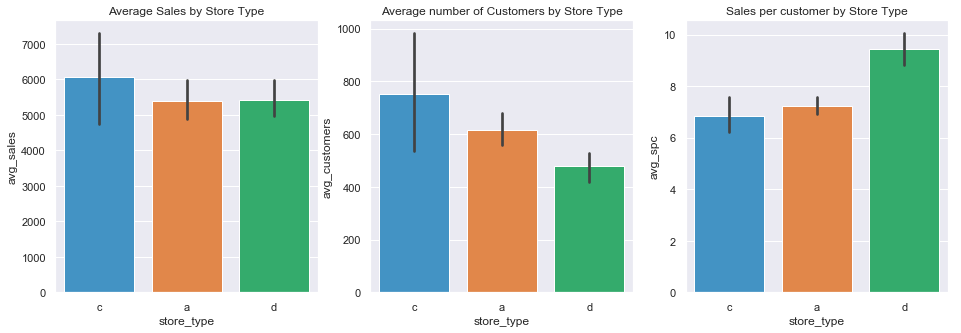

In [17]:
fig, (axis1,axis2, axis3) = plt.subplots(1,3,figsize=(16,5))
flatui = ['#2d98da', '#fa8231', '#20bf6b']
custom_palette = sns.color_palette(flatui)


# Average Sales 
sns.barplot(x='store_type', y='avg_sales', data=df_stores, ax=axis1, estimator=np.mean, palette=custom_palette)
axis1.title.set_text('Average Sales by Store Type')

# Average Customers
sns.barplot(x='store_type', y='avg_customers', data=df_stores, ax=axis2, estimator=np.mean, palette=custom_palette)
axis2.title.set_text('Average number of Customers by Store Type')

# Average SPC
sns.barplot(x='store_type', y='avg_spc', data=df_stores, ax=axis3, estimator=np.mean, palette=custom_palette)
axis3.title.set_text('Sales per customer by Store Type')

### Average Sales & Cutomer Spending by Sortiment

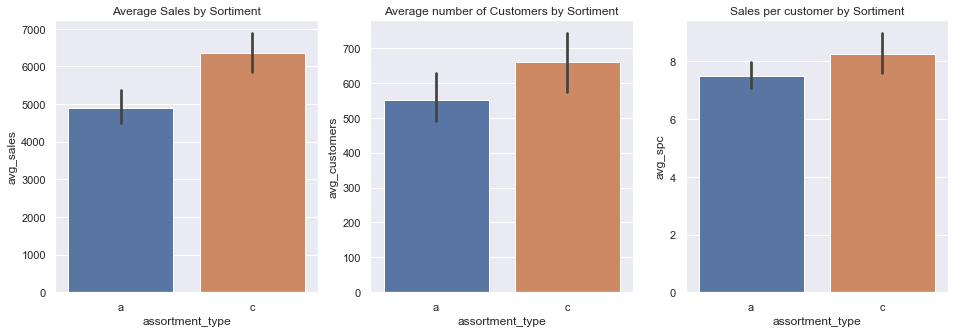

In [18]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(16,5))
sns.barplot(x='assortment_type', y='avg_sales', data=df_stores, ax=axis1)
axis1.title.set_text('Average Sales by Sortiment')

sns.barplot(x='assortment_type', y='avg_customers', data=df_stores, ax=axis2)
axis2.title.set_text('Average number of Customers by Sortiment')

sns.barplot(x='assortment_type', y='avg_spc', data=df_stores, ax=axis3)
axis3.title.set_text('Sales per customer by Sortiment')

#### For export

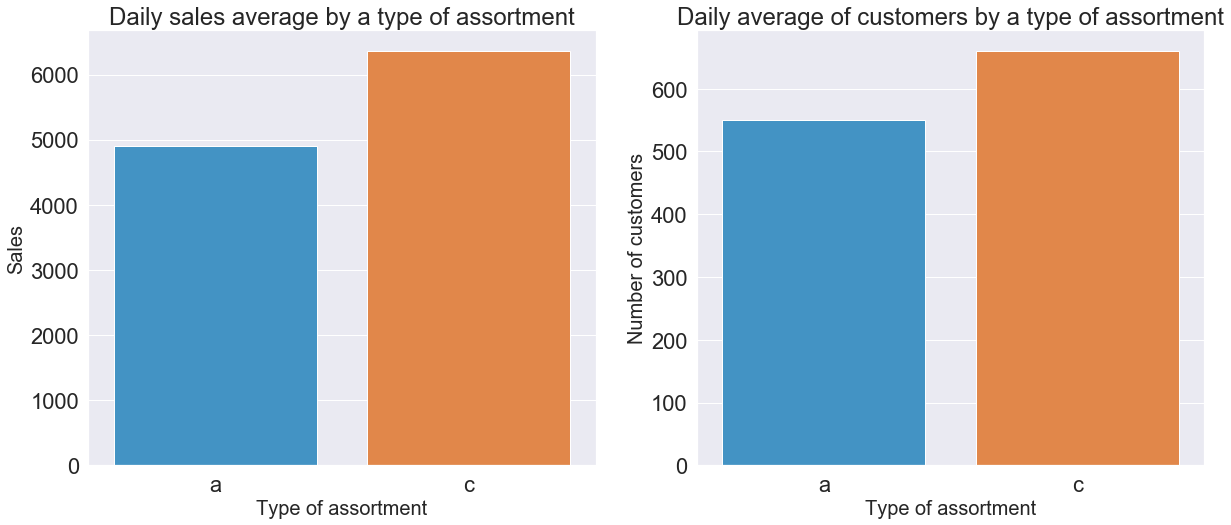

In [19]:
sns.set(font_scale=2)
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,8))
flatui = ['#2d98da', '#fa8231', '#20bf6b']
custom_palette = sns.color_palette(flatui)
# sns.set(font_scale=2)

# Average Customers
sns.barplot(x='assortment_type', y='avg_sales',ci=None, data=df_stores, ax=axis1, estimator=np.mean, palette=custom_palette)
axis1.axes.set_title("Daily sales average by a type of assortment",fontsize=24)
axis1.set_xlabel("Type of assortment",fontsize=20)
axis1.set_ylabel("Sales",fontsize=20)

# Average SPC
sns.barplot(x='assortment_type', y='avg_customers',ci=None, data=df_stores, ax=axis2, estimator=np.mean, palette=custom_palette)
axis2.axes.set_title("Daily average of customers by a type of assortment",fontsize=24)
axis2.set_xlabel("Type of assortment",fontsize=20)
axis2.set_ylabel("Number of customers",fontsize=20)

fig.savefig("exported_plots/assortment_type_plt.png")

## Sales By Store

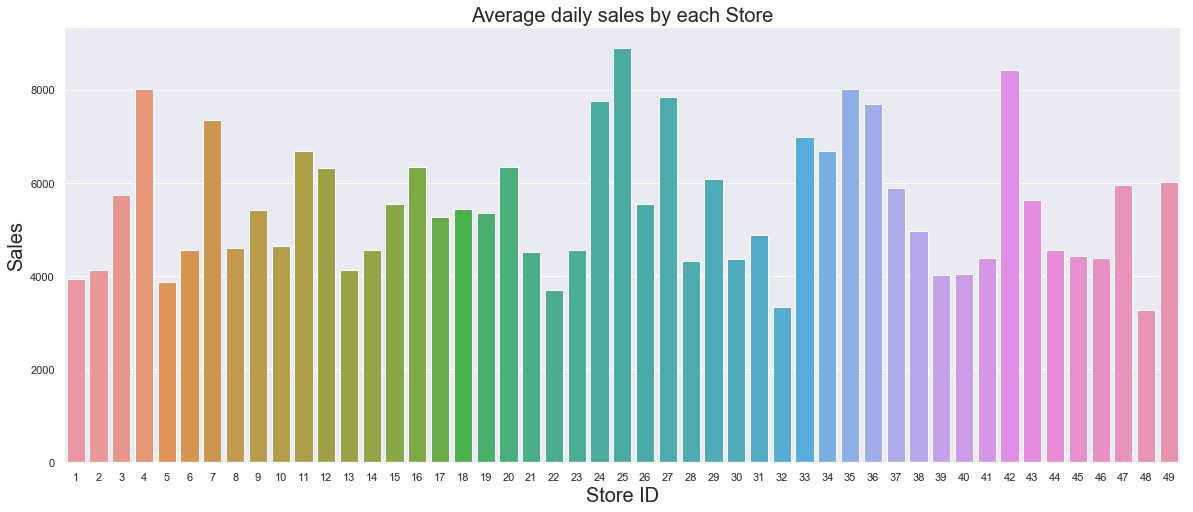

In [20]:
sns.set(font_scale=1)
fig, (axis1) = plt.subplots(1,1,figsize=(20,8))
sns.barplot(x='store',y='avg_sales', data=df_stores, ax=axis1)

axis1.set_title('Average daily sales by each Store',  fontsize=20)
axis1.set_xlabel("Store ID",fontsize=20)
axis1.set_ylabel("Sales",fontsize=20)

fig.savefig("exported_plots/sales_by_store_plt.png")

### Most of poorly performing shops have assortment A

Text(0, 0.5, 'Count')

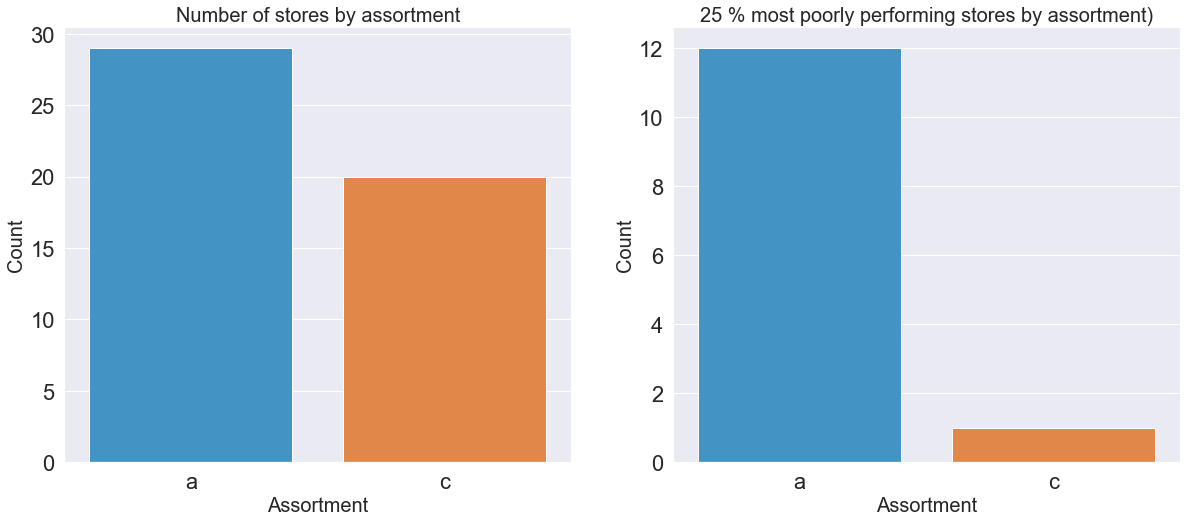

In [21]:
df_not_perf_stores = df_stores[df_stores['avg_sales'] <= df_stores['avg_sales'].quantile(0.25)]
sns.set(font_scale=2)
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,8))
flatui = ['#2d98da', '#fa8231', '#20bf6b']
custom_palette = sns.color_palette(flatui)


sns.countplot(x='assortment_type', data=df_stores, ax=axis1, palette=custom_palette)
axis1.set_title('Number of stores by assortment',  fontsize=20)
axis1.set_xlabel("Assortment",fontsize=20)
axis1.set_ylabel("Count",fontsize=20)

sns.countplot(x='assortment_type', data=df_not_perf_stores, ax=axis2, palette=custom_palette)
axis2.set_title('25 % most poorly performing stores by assortment)',  fontsize=20)
axis2.set_xlabel("Assortment",fontsize=20)
axis2.set_ylabel("Count",fontsize=20)


# fig.savefig("exported_plots/poorly_doing_stores_plt.png")

## Customer Spending by Store

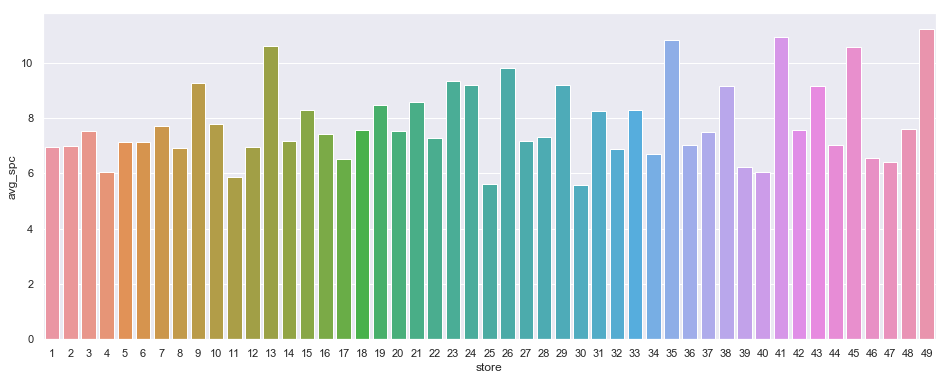

In [22]:
sns.set(font_scale=1)
plt.figure(figsize=(16,6))
sns.barplot(x='store',y='avg_spc', data=df_stores)

## Aggregating data to monthly

In [23]:
avg_monthly_data = df.groupby('date').mean()
avg_monthly_data = avg_monthly_data.resample("M").mean()
avg_monthly_data['year'], avg_monthly_data['month'], avg_monthly_data['day'] = avg_monthly_data.index.year, avg_monthly_data.index.month, avg_monthly_data.index.day

In [24]:
sum_monthly_data = df.groupby('date').sum()
sum_monthly_data = sum_monthly_data.resample("M").sum()
sum_monthly_data['year'], sum_monthly_data['month'], sum_monthly_data['day'] = sum_monthly_data.index.year, sum_monthly_data.index.month, sum_monthly_data.index.day

## Trend of Sales in dataset
We can see repeating patterns of peaks in July and before Christmas

## Trend in average daily sales

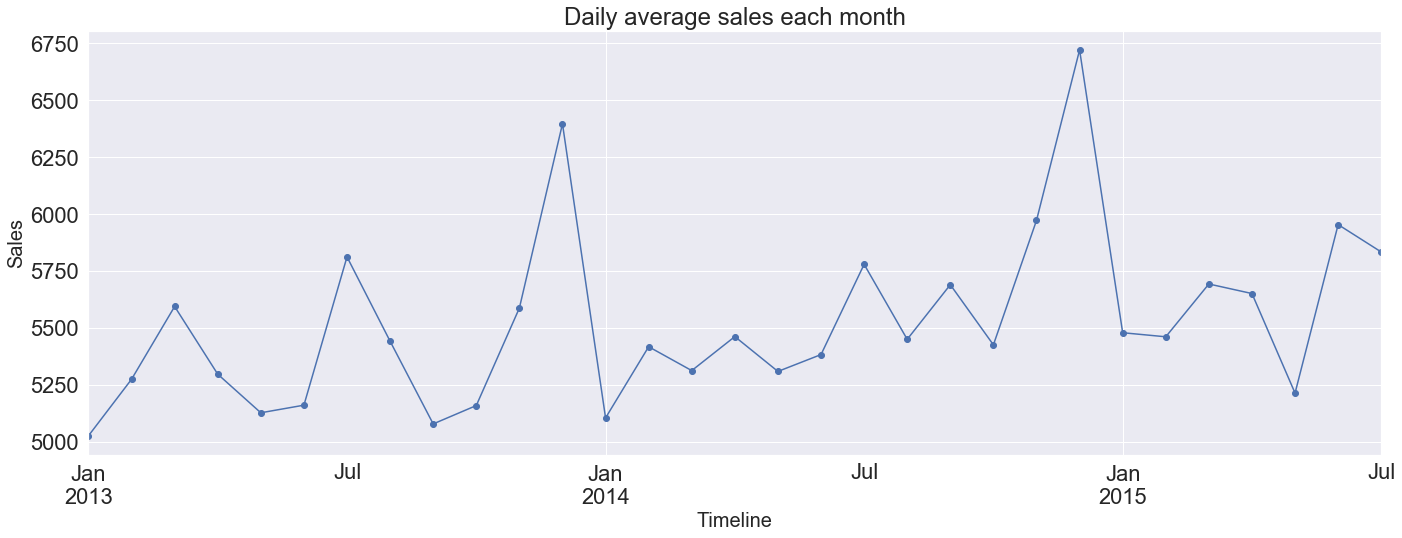

In [25]:
sns.set(font_scale=2)
fig, (axis1) = plt.subplots(1,1,figsize=(20,8))
flatui = ['#2d98da', '#fa8231', '#20bf6b']
custom_palette = sns.color_palette(flatui)


avg_monthly_data['Sales'].plot(marker='o', ax=axis1)
axis1.axes.set_title("Daily average sales each month",fontsize=24)
axis1.set_xlabel("Timeline",fontsize=20)
axis1.set_ylabel("Sales",fontsize=20)

fig.tight_layout()
fig.savefig("exported_plots/trend_sales_by_time.png")

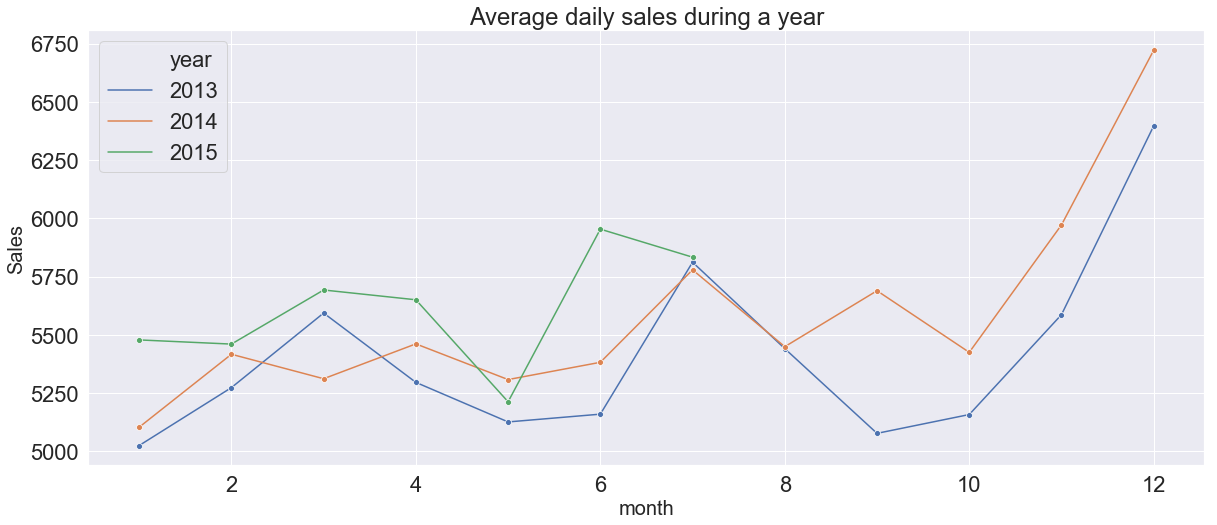

In [26]:
sns.set(font_scale=2)
fig, (axis1) = plt.subplots(1,1,figsize=(20,8))
custom_palette = sns.color_palette("deep", 3)
axis1.axes.set_title("Average daily sales during a year",fontsize=24)
axis1.set_xlabel("Timeline",fontsize=20)
axis1.set_ylabel("Average daily sales",fontsize=20)

sns.lineplot(x='month', y="Sales", data=avg_monthly_data, ci=None, hue='year',marker='o', palette=custom_palette)
fig.savefig("exported_plots/sales_trend_duriong_year_plt.png")

## Trend of customer's spending

Customers are spending more in summer than before Christmas

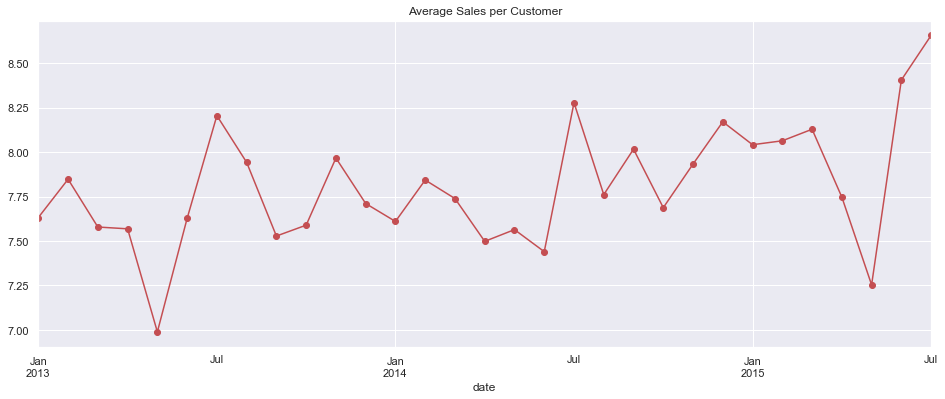

In [27]:
sns.set(font_scale=1)
plt.figure(figsize=(16,6))
plt.title('Average Sales per Customer')
avg_monthly_data['sales_per_customer'].plot(marker='o', color='r')

Text(0.5, 1.0, "Average Customer' spending by month")

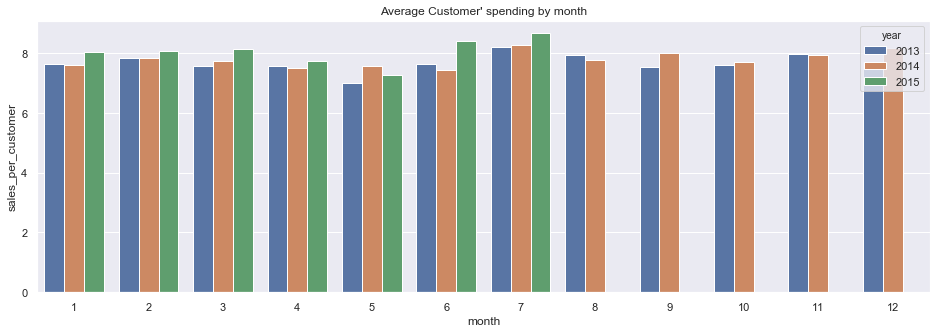

In [28]:
plt.figure(figsize=(16,5))
sns.barplot(x='month', y="sales_per_customer", data=avg_monthly_data, ci=None, hue='year')
plt.title('Average Customer\' spending by month')

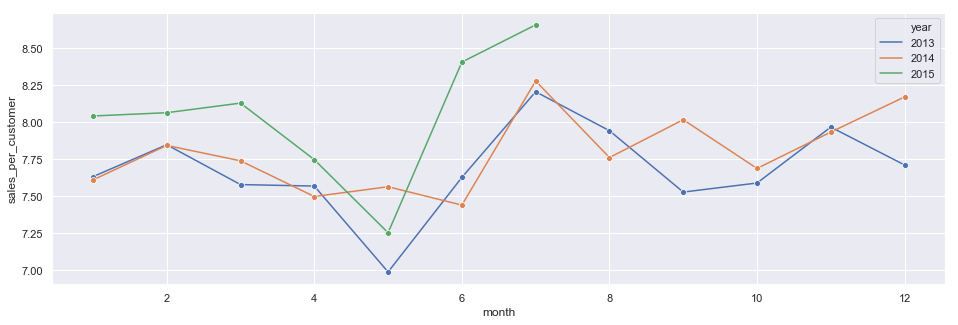

In [29]:
plt.figure(figsize=(16,5))
custom_palette = sns.color_palette("deep", 3)
sns.lineplot(x='month', y="sales_per_customer", data=avg_monthly_data, ci=None, hue='year', marker='o', palette=custom_palette)

## Customers Trend

Decreasing trend, but customers are spending more, so it is not that bad

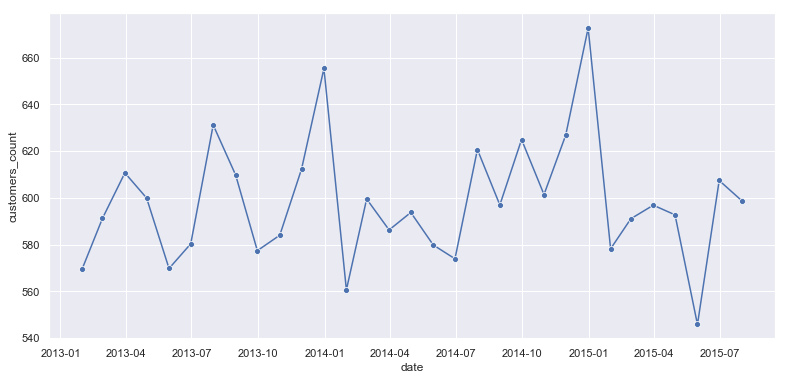

In [30]:
sns.set(font_scale=1)
plt.figure(figsize=(13,6))
sns.lineplot(x=avg_monthly_data.index, y="customers_count", marker='o', ci=None , data=avg_monthly_data)

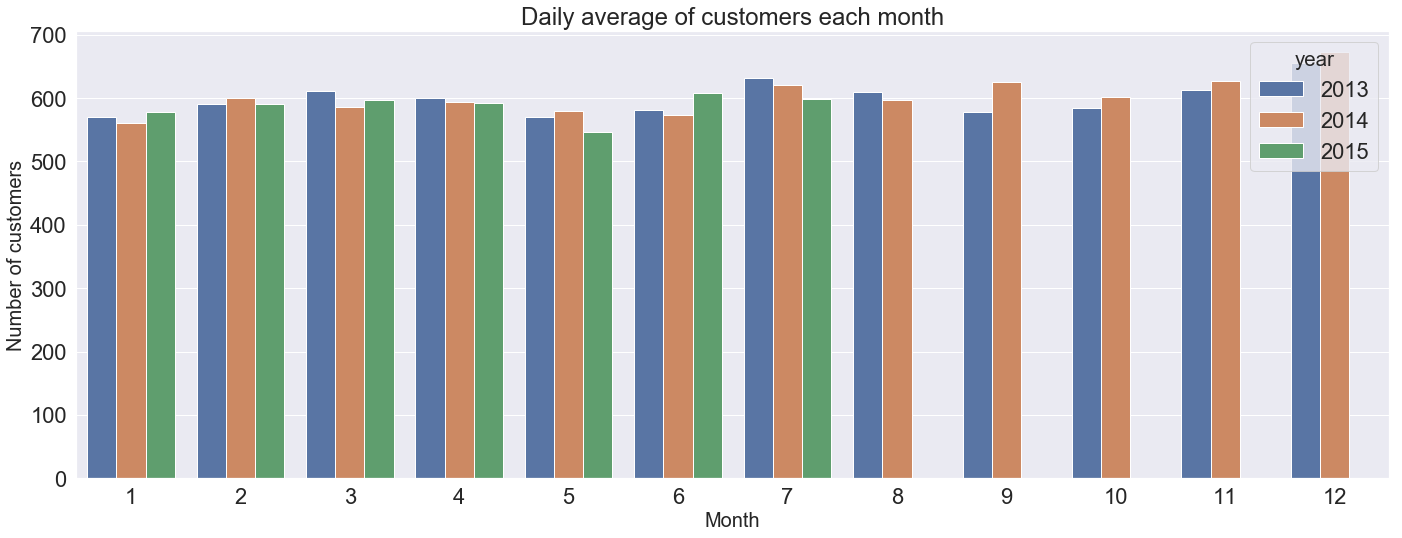

In [31]:
sns.set(font_scale=2)
fig, (axis1) = plt.subplots(1,1,figsize=(20,8))
flatui = ['#2d98da', '#fa8231', '#20bf6b']
custom_palette = sns.color_palette(flatui)


sns.barplot(x='month', y="customers_count", data=avg_monthly_data, ci=None, hue='year')
axis1.axes.set_title("Daily average of customers each month",fontsize=24)
axis1.set_xlabel("Month",fontsize=20)
axis1.set_ylabel("Number of customers",fontsize=20)

fig.tight_layout()
fig.savefig("exported_plots/avg_customers_each_month_plt.png")

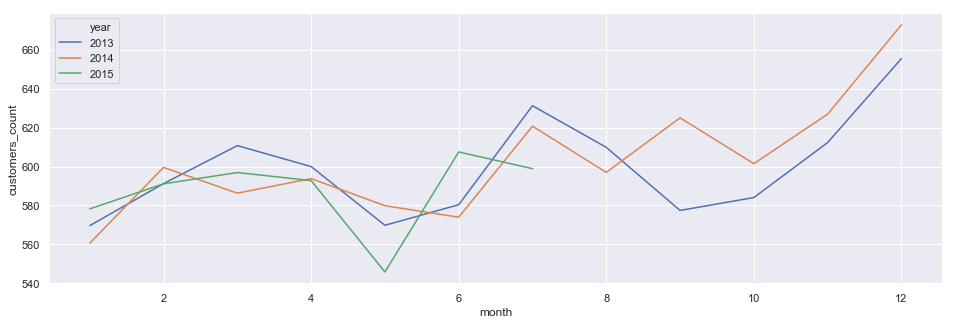

In [32]:
sns.set(font_scale=1)
plt.figure(figsize=(16,5))
custom_palette = sns.color_palette("deep", 3)
sns.lineplot(x='month', y="customers_count", data=avg_monthly_data, ci=None, hue='year', palette=custom_palette)

### Average daily sales by Month

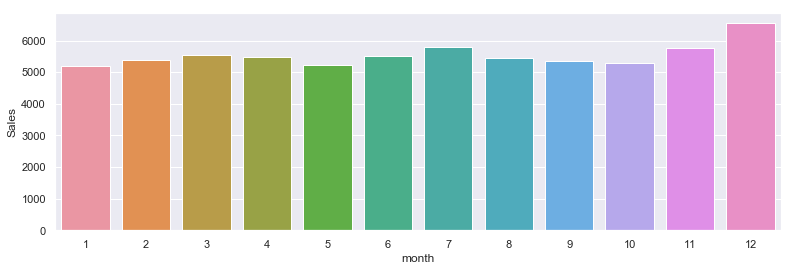

In [33]:
plt.figure(figsize=(13,4))
sns.barplot(x='month', y="Sales", data=df, ci=None)

## Distribution of 25 % most profitable days

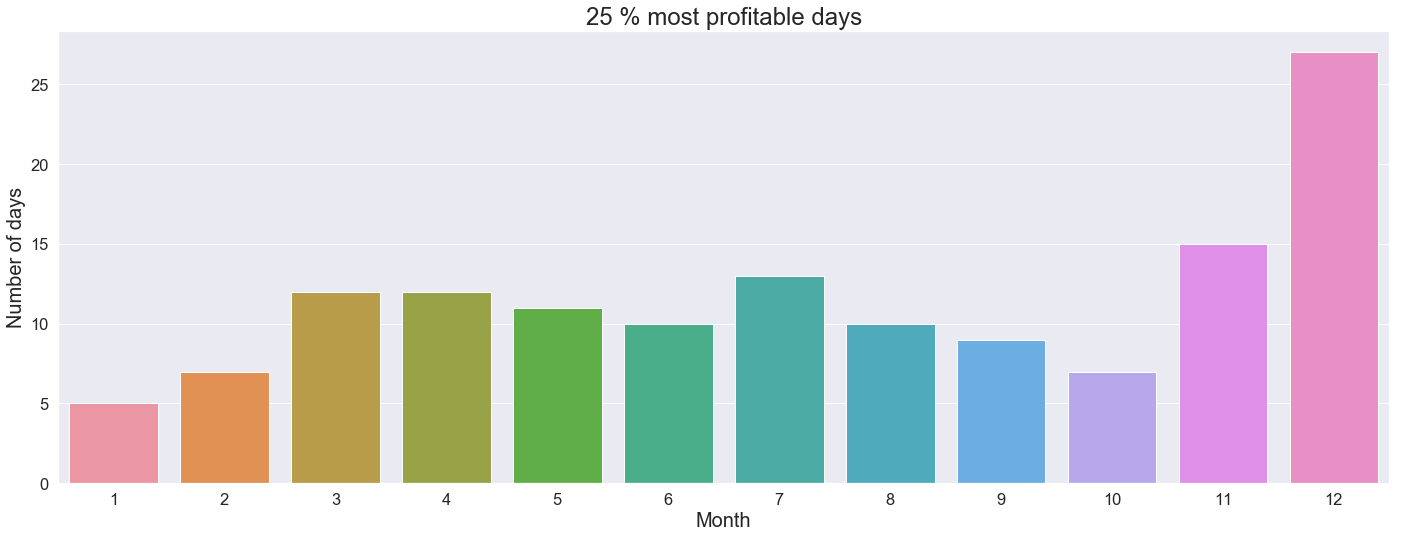

In [34]:
sns.set(font_scale=1.5)
avg_sales_by_date = df.groupby('date').mean()
top_sales_percentile = df['Sales'].quantile(.75)
df_to_plot = avg_sales_by_date[avg_sales_by_date['Sales'] >= top_sales_percentile]

# Only counting full years
df_to_plot = df_to_plot.loc['2013-01-01':'2015-01-01']
df_to_plot['year'], df_to_plot['month'], df_to_plot['day'] = df_to_plot.index.year, df_to_plot.index.month, df_to_plot.index.day
# Show only rows which meet a condition of quantile
df_to_plot = df_to_plot[df_to_plot['Sales'].notnull()]

# Plot

fig, (axis1) = plt.subplots(1,1,figsize=(20,8))
flatui = ['#2d98da', '#fa8231', '#20bf6b']
custom_palette = sns.color_palette(flatui)
sns.set(font_scale=2)

sns.countplot(x=df_to_plot['month'], ax=axis1)
axis1.axes.set_title("25 % most profitable days",fontsize=24)
axis1.set_xlabel("Month",fontsize=20)
axis1.set_ylabel("Number of days",fontsize=20)

fig.tight_layout()
fig.savefig("exported_plots/trend_sales_by_month.png")

## Daily sales in most profitable month December

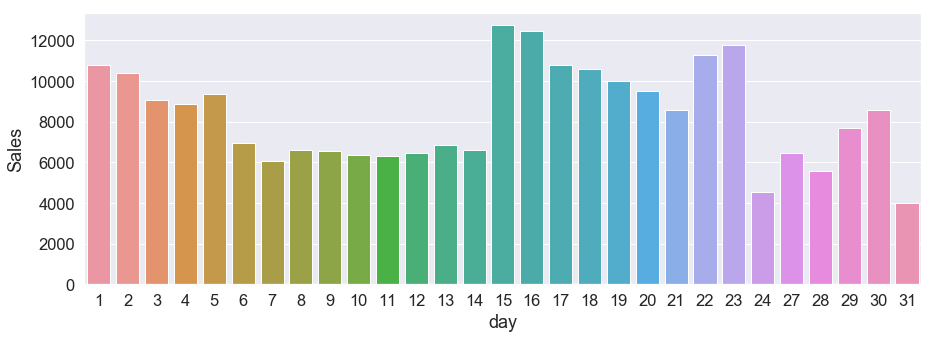

In [35]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,5))
df_december = df[(df['month'] == 12) & (df['store_open'] == 1)]
sns.barplot(x=df_december['day'], y=df_december['Sales'], ci=None)

### Average daily sales by Day in the month

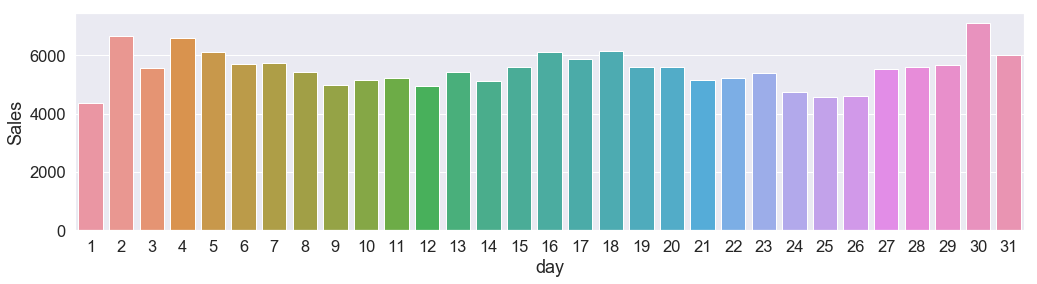

In [36]:
sns.set(font_scale=1.5)
plt.figure(figsize=(17,4))
sns.barplot(x='day', y="Sales", data=df, ci=None)

## Trend during a week

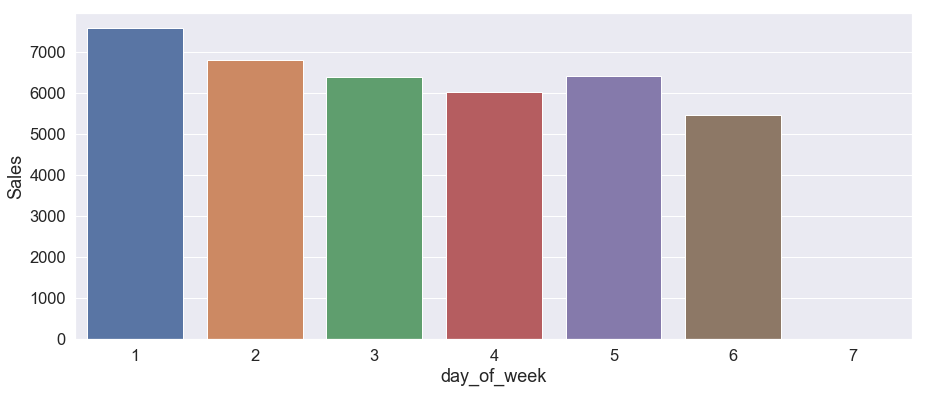

In [37]:
# Mean Sales
sns.set(font_scale=1.5)
plt.figure(figsize=(15,6))
sns.barplot(x='day_of_week', y="Sales", data=df, ci=None)

Trend is visible only with **sales supported with promotions**

<Figure size 1080x432 with 0 Axes>

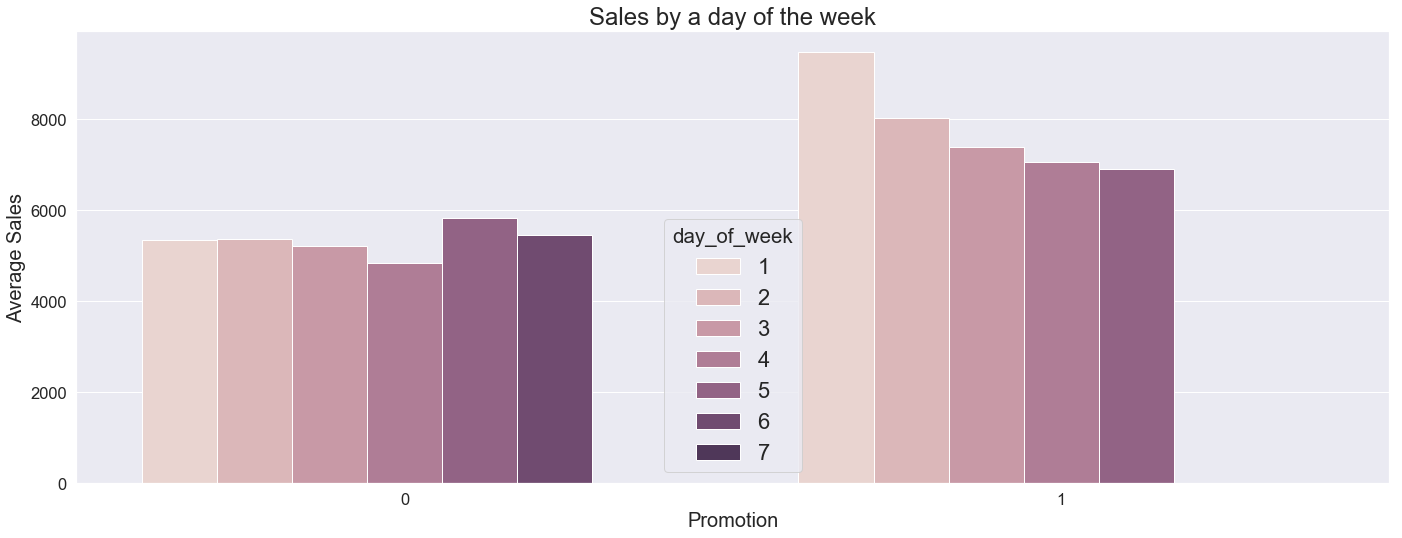

In [38]:
plt.figure(figsize=(15,6))

fig, (axis1) = plt.subplots(1,1,figsize=(20,8))
flatui = ['#9b59b6', '#3498db', '#2ecc71', '#e74c3c', '#f1c40f', '#34495e', '#ecf0f1']
custom_palette = sns.color_palette(flatui)
sns.set(font_scale=2)

sns.barplot(x='promo', y="Sales", hue='day_of_week', data=df, ci=None, palette=sns.cubehelix_palette(8))
axis1.axes.set_title("Sales by a day of the week",fontsize=24)
axis1.set_xlabel("Promotion",fontsize=20)
axis1.set_ylabel("Average Sales",fontsize=20)

fig.tight_layout()
fig.savefig("exported_plots/trend_sales_by_day_of_week.png")

### Closed Stores

Closed stores are not generating sales

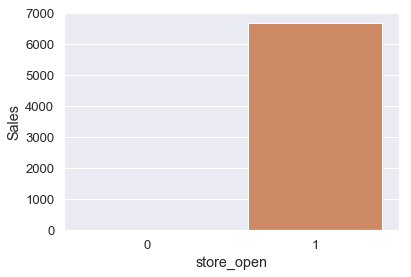

In [39]:
# plt.figure(figsize=(15,6))
sns.set(font_scale=1.2)
sns.barplot(x='store_open', y="Sales", data=df, ci=None)

Store 26 was closed more often than others

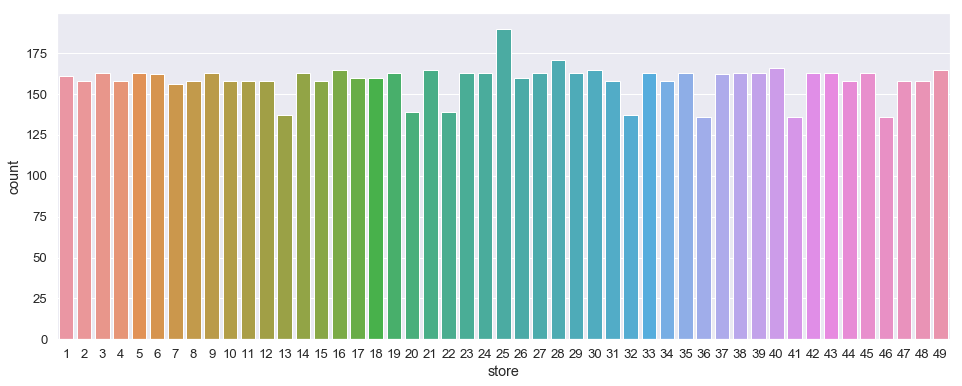

In [40]:
sns.set(font_scale=1.2)
ax = plt.figure(figsize=(16,6))
sns.countplot(x='store',orient = 'h', data=df[df['store_open'] == 0])
# sns.despine(left=True, bottom=True, orient = 'h')

## Shop status on School Holiday

Average daily sales are larger during school holidays

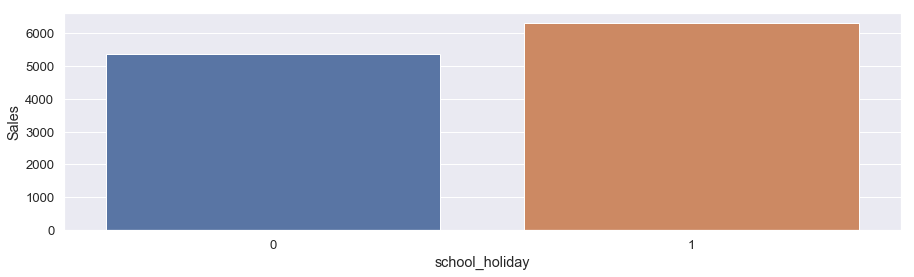

In [41]:
plt.figure(figsize=(15,4))
sns.barplot(x='school_holiday', y="Sales", data=df, ci=None)

Most stores are open during school holidays

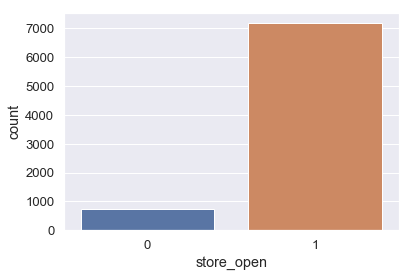

In [42]:
sns.countplot(x='store_open', data=df[df['school_holiday'] == 1])

A few stores are closed more often during holidays than others

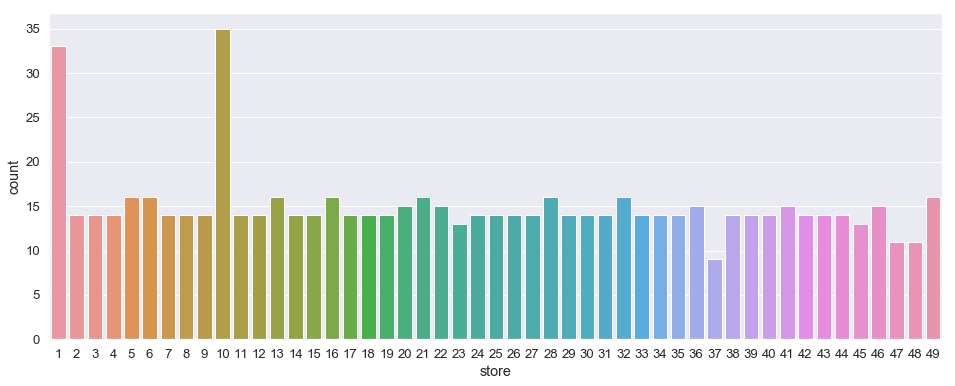

In [43]:
plt.figure(figsize=(16,6))
sns.countplot(x='store',orient = 'h', data=df[(df['school_holiday'] == 1) & (df['store_open'] == 0)])

### Statutory holidays

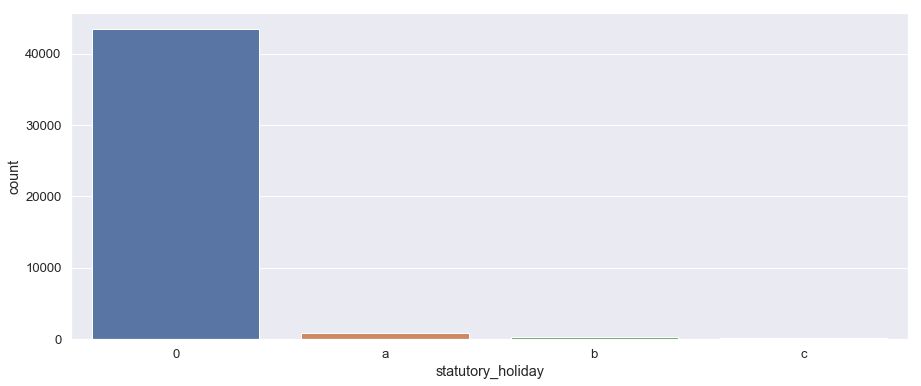

In [44]:
plt.figure(figsize=(15,6))
sns.countplot(x='statutory_holiday', data=df)